In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [3]:
warnings.filterwarnings("ignore")

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
df = pd.read_csv('full_data_train.csv')

In [6]:
df2 = df.drop(['therapy_start_date','therapy_end_date','medclm_key','clm_unique_key','primary_diag_cd','visit_date','process_date_x','document_key','ndc_id','service_date','process_date_y','mail_order_ind','generic_ind','clm_type_x','clm_type_y','diag_cd2','diag_cd3','diag_cd4','diag_cd5','diag_cd6','diag_cd7','diag_cd8','diag_cd9','gpi_drug_group_desc','gpi_drug_class_desc','util_cat','pot','hedis_pot','ade_diagnosis','seizure_diagnosis','pain_diagnosis','fatigue_diagnosis','nausea_diagnosis','hyperglycemia_diagnosis','constipation_diagnosis','diarrhea_diagnosis','reversal_ind_x','reversal_ind_y','rx_cost','tot_drug_cost_accum_amt','hum_drug_class_desc','strength_meas'], axis=1)  

In [7]:
df2 = df2.dropna()

In [8]:
df2 = df2.drop(['id','therapy_id'], axis=1)

In [9]:
df_SRF = df2

In [10]:
df_SRF.head(3)

,tgt_ade_dc_ind,race_cd,est_age,sex_cd,cms_disabled_ind,cms_low_income_ind,pay_day_supply_cnt,maint_ind,metric_strength,specialty_ind,ddi_ind,anticoag_ind,diarrhea_treat_ind,nausea_treat_ind,seizure_treat_ind
4120,1.0,1.0,86.0,M,0.0,0.0,90.0,MAINT,10.0,NONSPCL,0.0,0.0,0.0,0.0,0.0
4121,1.0,1.0,86.0,M,0.0,0.0,30.0,MAINT,10.0,NONSPCL,0.0,0.0,0.0,0.0,0.0
4122,1.0,1.0,86.0,M,0.0,0.0,30.0,MAINT,10.0,NONSPCL,0.0,0.0,0.0,0.0,0.0


In [11]:
y = df_SRF['tgt_ade_dc_ind']
x = df_SRF.drop(columns=['tgt_ade_dc_ind'])

In [12]:
df_holdout = pd.read_csv('full_data_holdout.csv')
df_holdout.head(3)

,id,therapy_id,therapy_start_date,race_cd,est_age,sex_cd,cms_disabled_ind,cms_low_income_ind,medclm_key,clm_unique_key,primary_diag_cd,visit_date,diag_cd2,diag_cd3,diag_cd4,diag_cd5,diag_cd6,diag_cd7,diag_cd8,diag_cd9,process_date_x,reversal_ind_x,pot,util_cat,hedis_pot,clm_type_x,ade_diagnosis,seizure_diagnosis,pain_diagnosis,fatigue_diagnosis,nausea_diagnosis,hyperglycemia_diagnosis,constipation_diagnosis,diarrhea_diagnosis,document_key,ndc_id,service_date,process_date_y,pay_day_supply_cnt,rx_cost,tot_drug_cost_accum_amt,reversal_ind_y,mail_order_ind,generic_ind,maint_ind,gpi_drug_group_desc,gpi_drug_class_desc,hum_drug_class_desc,strength_meas,metric_strength,specialty_ind,clm_type_y,ddi_ind,anticoag_ind,diarrhea_treat_ind,nausea_treat_ind,seizure_treat_ind
0,1018450235,1018450235-TAGRISSO-1,2022-05-23T00:00:00.000+0000,5.0,75.0,F,0.0,0.0,40563835197,964264000482910803,C3490,2022-03-30T00:00:00.000Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-05-17T04:00:00.000Z,NaN,Physician_Office,Physician_Office,Outpatient,med,0,0,0,0,0,0,0,0,B225088439681001,42806001105,2022-04-18T00:00:00.000+0000,2022-04-19T00:00:00.000+0000,15,10.58,26799.38,N,N,GENERIC,NONMAINT,*ANALGESICS - ANTI-INFLAMMATORY*,*NONSTEROIDAL ANTI-INFLAMMATORY AGENTS (NSAIDS)**,PAIN MGMT - NSAID AGENTS,MG,200.0,NONSPCL,rx,0,0,0,0,0
1,1018450235,1018450235-TAGRISSO-1,2022-05-23T00:00:00.000+0000,5.0,75.0,F,0.0,0.0,40563835197,964264000482910803,C3490,2022-03-30T00:00:00.000Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-05-17T04:00:00.000Z,NaN,Physician_Office,Physician_Office,Outpatient,med,0,0,0,0,0,0,0,0,B225118030601001,61314064610,2022-04-21T00:00:00.000+0000,2022-04-22T00:00:00.000+0000,8,76.75,26814.91,N,N,GENERIC,NONMAINT,*OTIC AGENTS*,*OTIC COMBINATIONS**,EAR/MOUTH/THROAT,-10K-1,3.5,NONSPCL,rx,0,0,0,0,0
2,1018450235,1018450235-TAGRISSO-1,2022-05-23T00:00:00.000+0000,5.0,75.0,F,0.0,0.0,40563835197,964264000482910803,C3490,2022-03-30T00:00:00.000Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-05-17T04:00:00.000Z,NaN,Physician_Office,Physician_Office,Outpatient,med,0,0,0,0,0,0,0,0,B225432140861001,310135030,2022-05-23T00:00:00.000+0000,2022-05-24T00:00:00.000+0000,30,15038.13,27025.17,N,N,BRANDED,NONMAINT,*ANTINEOPLASTICS AND ADJUNCTIVE THERAPIES*,*ANTINEOPLASTIC - EGFR INHIBITORS**,CHEMOTHERAPY,MG,80.0,SPCL,rx,0,0,0,0,0


In [13]:
# Predicting the probabilities and the predicted values of the classes using the model
X_holdout = df_holdout.drop(['therapy_start_date','medclm_key','clm_unique_key','primary_diag_cd','visit_date','process_date_x','document_key','ndc_id','service_date','process_date_y','mail_order_ind','generic_ind','clm_type_x','clm_type_y','diag_cd2','diag_cd3','diag_cd4','diag_cd5','diag_cd6','diag_cd7','diag_cd8','diag_cd9','gpi_drug_group_desc','gpi_drug_class_desc','util_cat','pot','hedis_pot','ade_diagnosis','seizure_diagnosis','pain_diagnosis','fatigue_diagnosis','nausea_diagnosis','hyperglycemia_diagnosis','constipation_diagnosis','diarrhea_diagnosis','reversal_ind_x','reversal_ind_y','rx_cost','tot_drug_cost_accum_amt','hum_drug_class_desc','strength_meas'], axis=1)

In [14]:
X_holdout = X_holdout.dropna()

In [15]:
X_holdout = X_holdout.drop(['id','therapy_id'], axis=1)

In [16]:
from sklearn.preprocessing import OneHotEncoder

# Initialize the encoder with handle_unknown='ignore'
encoder = OneHotEncoder(handle_unknown='ignore')

# Fit and transform on the training data
x = encoder.fit_transform(x)

# Transform the testing data
X_holdout = encoder.transform(X_holdout)

In [17]:
from statistics import mean
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# SMOTE (Synthetic Minority Oversampling Technique)

In [18]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [19]:
#Use SMOTE to oversample the minority class
oversample = SMOTE()
over_X, over_y = oversample.fit_resample(x, y)
over_X_train, over_X_test, over_y_train, over_y_test = train_test_split(over_X, over_y, test_size=0.3, stratify=over_y)

In [20]:
#Build SMOTE SRF model
SMOTE_SRF = RandomForestClassifier(n_estimators=20, random_state=12345, max_depth = 25, min_samples_leaf=200, min_samples_split=200)

In [21]:
#Randomly spilt dataset to test and train set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y)
#Train SMOTE SRF
SMOTE_SRF.fit(over_X_train, over_y_train)
#SMOTE SRF prediction result
y_train_predict = SMOTE_SRF.predict(x_train)
y_test_predict = SMOTE_SRF.predict(x_test)

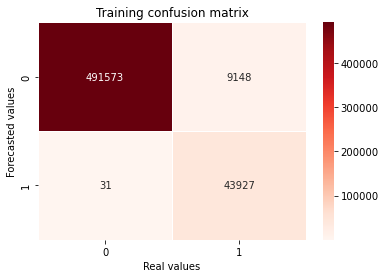

In [22]:
# Confusion matrix train 
cm = confusion_matrix(y_train, y_train_predict)
sns.heatmap(cm, linewidth = 0.5, annot = True, cmap = 'Reds', fmt = 'g')
plt.ylabel('Forecasted values')
plt.xlabel('Real values')
plt.title('Training confusion matrix')
plt.show()

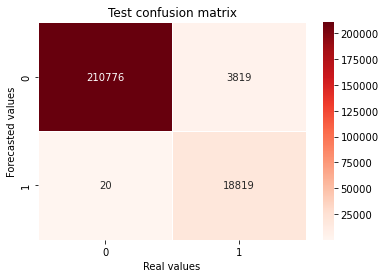

In [23]:
# confusion matrix test
cm = confusion_matrix(y_test, y_test_predict)
sns.heatmap(cm, linewidth = 0.5, annot = True, cmap = 'Reds', fmt = 'g')
plt.ylabel('Forecasted values')
plt.xlabel('Real values')
plt.title('Test confusion matrix')
plt.show()

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_predict))
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99    500721
         1.0       0.83      1.00      0.91     43958

    accuracy                           0.98    544679
   macro avg       0.91      0.99      0.95    544679
weighted avg       0.99      0.98      0.98    544679

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99    214595
         1.0       0.83      1.00      0.91     18839

    accuracy                           0.98    233434
   macro avg       0.92      0.99      0.95    233434
weighted avg       0.99      0.98      0.98    233434



In [25]:
print("Train accuracy: ", accuracy_score(y_train, y_train_predict))
print("Test accuracy: ", accuracy_score(y_test, y_test_predict))

Train accuracy:  0.9831478724165976
Test accuracy:  0.9835542380287362


In [26]:
print("Train auc: ", roc_auc_score(y_train, y_train_predict))
print("Test auc: ", roc_auc_score(y_test, y_test_predict))

Train auc:  0.9905125631124827
Test auc:  0.9905710292691342


# Holdout

In [28]:
#X_holdout.head(3)

AttributeError: head not found

In [29]:
pred_p = SMOTE_SRF.predict_proba(X_holdout)
pred_v = SMOTE_SRF.predict(X_holdout)

In [30]:
# check predicted probability
pred_p

# check predicted class
pred_v

array([0., 0., 0., ..., 0., 0., 0.])

In [31]:
df_holdout = pd.read_csv('full_data_holdout.csv')

In [32]:
X_holdout = df_holdout.drop(['therapy_start_date','medclm_key','clm_unique_key','primary_diag_cd','visit_date','process_date_x','document_key','ndc_id','service_date','process_date_y','mail_order_ind','generic_ind','clm_type_x','clm_type_y','diag_cd2','diag_cd3','diag_cd4','diag_cd5','diag_cd6','diag_cd7','diag_cd8','diag_cd9','gpi_drug_group_desc','gpi_drug_class_desc','util_cat','pot','hedis_pot','ade_diagnosis','seizure_diagnosis','pain_diagnosis','fatigue_diagnosis','nausea_diagnosis','hyperglycemia_diagnosis','constipation_diagnosis','diarrhea_diagnosis','reversal_ind_x','reversal_ind_y','rx_cost','tot_drug_cost_accum_amt','hum_drug_class_desc','strength_meas'], axis=1)

In [33]:
X_holdout = X_holdout.dropna()

In [34]:
# because pred_p contains probability pairs for 0 and 1, only 1 is needed for this problem.
pred_p[:,1]

# combine id and "score" into a dataframe
# id_column = df_all_holdout['therapy_id']
id_column = X_holdout['id']
df_id_score = pd.DataFrame({'id': id_column, 'score_probability': pred_p[:,1], 'score_value': pred_v})
df_id_score

,id,score_probability,score_value
0,1018450235,0.142985,0.0
1,1018450235,0.062186,0.0
2,1018450235,0.051475,0.0
3,1018450235,0.120749,0.0
4,1018450235,0.108864,0.0
...,...,...,...
603999,1065167833,0.299471,0.0
604000,1065167833,0.269445,0.0
604003,1065167833,0.333437,0.0
604008,1065167833,0.428111,0.0


In [35]:
# calculate the average score for each unique ID
# here I used median as the averaging metric
df_id_score_avg = df_id_score.groupby('id').agg(avg_score_probability = ('score_probability','median'), avg_score_value = ('score_value', 'median'))
df_id_score_avg

,avg_score_probability,avg_score_value
id,,
1000261259,0.169628,0.0
1001691228,0.132884,0.0
1002060555,0.184304,0.0
1003935675,0.156444,0.0
1004837018,0.146429,0.0
...,...,...
1120074596,0.148637,0.0
1120110207,0.125661,0.0
1120436512,0.276802,0.0


In [36]:
# sort the score values in a descending order
df_id_score_avg_sort = df_id_score_avg.sort_values(by='avg_score_probability', ascending=False)
df_id_score_avg_sort = df_id_score_avg_sort.reset_index()
df_id_score_avg_sort

,id,avg_score_probability,avg_score_value
0,1006981645,0.765200,1.0
1,1080946416,0.756246,1.0
2,1030747644,0.673673,1.0
3,1101837367,0.669802,1.0
4,1089029009,0.660599,1.0
...,...,...,...
168,1117754514,0.021544,0.0
169,1103239232,0.021202,0.0
170,1072992888,0.020390,0.0
171,1065676840,0.015761,0.0


In [37]:
# add a rank column based on the "score" values in a descending order
df_id_score_rank = df_id_score_avg_sort.copy()
df_id_score_rank['rank'] = df_id_score_rank.index + 1

# df_id_score_rank['rank'] = df.apply(lambda row: row.name + 1, axis=1)
df_id_score_rank

,id,avg_score_probability,avg_score_value,rank
0,1006981645,0.765200,1.0,1
1,1080946416,0.756246,1.0,2
2,1030747644,0.673673,1.0,3
3,1101837367,0.669802,1.0,4
4,1089029009,0.660599,1.0,5
...,...,...,...,...
168,1117754514,0.021544,0.0,169
169,1103239232,0.021202,0.0,170
170,1072992888,0.020390,0.0,171
171,1065676840,0.015761,0.0,172


In [38]:
# drop avg_score_probability and rename columns
df_final_R1 = df_id_score_rank.drop('avg_score_value', axis=1)
 
df_final_R1.rename(columns={'avg_score_probability': 'score'}, inplace=True)
df_final_R1

,id,score,rank
0,1006981645,0.765200,1
1,1080946416,0.756246,2
2,1030747644,0.673673,3
3,1101837367,0.669802,4
4,1089029009,0.660599,5
...,...,...,...
168,1117754514,0.021544,169
169,1103239232,0.021202,170
170,1072992888,0.020390,171
171,1065676840,0.015761,172


In [68]:
df_final_R1.to_csv("2023CaseCompetition_Dania_Crivelli_20231003.csv", index=False)

# BRF MODEL

In [39]:
df = pd.read_csv('full_data_train.csv')

In [40]:
df2 = df.drop(['therapy_start_date','therapy_end_date','medclm_key','clm_unique_key','primary_diag_cd','visit_date','process_date_x','document_key','ndc_id','service_date','process_date_y','mail_order_ind','generic_ind','clm_type_x','clm_type_y','diag_cd2','diag_cd3','diag_cd4','diag_cd5','diag_cd6','diag_cd7','diag_cd8','diag_cd9','gpi_drug_group_desc','gpi_drug_class_desc','util_cat','pot','hedis_pot','ade_diagnosis','seizure_diagnosis','pain_diagnosis','fatigue_diagnosis','nausea_diagnosis','hyperglycemia_diagnosis','constipation_diagnosis','diarrhea_diagnosis','reversal_ind_x','reversal_ind_y','rx_cost','tot_drug_cost_accum_amt','hum_drug_class_desc','strength_meas'], axis=1)  

In [41]:
df2 = df2.dropna()

In [42]:
df2 = df2.drop(['id','therapy_id'], axis=1)

In [43]:
y = df2['tgt_ade_dc_ind']
x = df2.drop(columns=['tgt_ade_dc_ind'])

In [44]:
df_holdout = pd.read_csv('full_data_holdout.csv')

In [45]:
X_holdout = df_holdout.drop(['therapy_start_date','medclm_key','clm_unique_key','primary_diag_cd','visit_date','process_date_x','document_key','ndc_id','service_date','process_date_y','mail_order_ind','generic_ind','clm_type_x','clm_type_y','diag_cd2','diag_cd3','diag_cd4','diag_cd5','diag_cd6','diag_cd7','diag_cd8','diag_cd9','gpi_drug_group_desc','gpi_drug_class_desc','util_cat','pot','hedis_pot','ade_diagnosis','seizure_diagnosis','pain_diagnosis','fatigue_diagnosis','nausea_diagnosis','hyperglycemia_diagnosis','constipation_diagnosis','diarrhea_diagnosis','reversal_ind_x','reversal_ind_y','rx_cost','tot_drug_cost_accum_amt','hum_drug_class_desc','strength_meas'], axis=1)

In [46]:
X_holdout = X_holdout.dropna()

In [47]:
X_holdout = X_holdout.drop(['id','therapy_id'], axis=1)

In [48]:
# Initialize the encoder with handle_unknown='ignore'
encoder = OneHotEncoder(handle_unknown='ignore')

# Fit and transform on the training data
x = encoder.fit_transform(x)

# Transform the testing data
X_holdout = encoder.transform(X_holdout)

In [49]:
from sklearn.model_selection import train_test_split

x_train2, x_test2, y_train2, y_test2 = train_test_split(
    x, y, test_size=0.30, random_state=100)

In [50]:
from imblearn.ensemble import BalancedRandomForestClassifier

In [51]:
#Build BRF model
BRFC = BalancedRandomForestClassifier(n_estimators=50, random_state=12345,max_depth = 20, min_samples_leaf=20, min_samples_split=20)
BRFC.fit(x_train2, y_train2)

BalancedRandomForestClassifier(max_depth=20, min_samples_leaf=20,
                               min_samples_split=20, n_estimators=50,
                               random_state=12345)

In [52]:
y_train_predict2 = BRFC.predict(x_train2)
y_test_predict2 = BRFC.predict(x_test2)

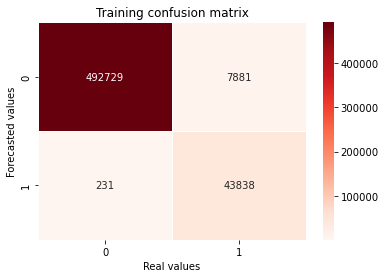

In [53]:
# Confusion matrix train 
cm = confusion_matrix(y_train2, y_train_predict2)
sns.heatmap(cm, linewidth = 0.5, annot = True, cmap = 'Reds', fmt = 'g')
plt.ylabel('Forecasted values')
plt.xlabel('Real values')
plt.title('Training confusion matrix')
plt.show()

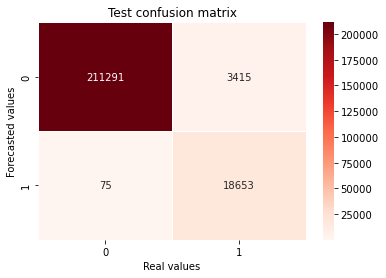

In [54]:
# confusion matrix test
cm = confusion_matrix(y_test2, y_test_predict2)
sns.heatmap(cm, linewidth = 0.5, annot = True, cmap = 'Reds', fmt = 'g')
plt.ylabel('Forecasted values')
plt.xlabel('Real values')
plt.title('Test confusion matrix')
plt.show()

In [55]:
from sklearn.metrics import classification_report
print(classification_report(y_train2, y_train_predict2))
print(classification_report(y_test2, y_test_predict2))

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99    500610
         1.0       0.85      0.99      0.92     44069

    accuracy                           0.99    544679
   macro avg       0.92      0.99      0.95    544679
weighted avg       0.99      0.99      0.99    544679

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99    214706
         1.0       0.85      1.00      0.91     18728

    accuracy                           0.99    233434
   macro avg       0.92      0.99      0.95    233434
weighted avg       0.99      0.99      0.99    233434



In [56]:
print("Train accuracy: ", accuracy_score(y_train2, y_train_predict2))
print("Test accuracy: ", accuracy_score(y_test2, y_test_predict2))

Train accuracy:  0.9851068243864735
Test accuracy:  0.9850493072988511


In [57]:
print("Train auc: ", roc_auc_score(y_train2, y_train_predict2))
print("Test auc: ", roc_auc_score(y_test2, y_test_predict2))

Train auc:  0.9895077131362081
Test auc:  0.9900449152083124


In [58]:
pred_p2 = BRFC.predict_proba(X_holdout)
pred_v2 = BRFC.predict(X_holdout)

In [59]:
# check predicted probability
pred_p

# check predicted class
pred_v

array([0., 0., 0., ..., 0., 0., 0.])

In [60]:
df_holdout = pd.read_csv('full_data_holdout.csv')

In [61]:
X_holdout = df_holdout.drop(['therapy_start_date','medclm_key','clm_unique_key','primary_diag_cd','visit_date','process_date_x','document_key','ndc_id','service_date','process_date_y','mail_order_ind','generic_ind','clm_type_x','clm_type_y','diag_cd2','diag_cd3','diag_cd4','diag_cd5','diag_cd6','diag_cd7','diag_cd8','diag_cd9','gpi_drug_group_desc','gpi_drug_class_desc','util_cat','pot','hedis_pot','ade_diagnosis','seizure_diagnosis','pain_diagnosis','fatigue_diagnosis','nausea_diagnosis','hyperglycemia_diagnosis','constipation_diagnosis','diarrhea_diagnosis','reversal_ind_x','reversal_ind_y','rx_cost','tot_drug_cost_accum_amt','hum_drug_class_desc','strength_meas'], axis=1)

In [62]:
X_holdout = X_holdout.dropna()

In [63]:
# because pred_p contains probability pairs for 0 and 1, only 1 is needed for this problem.
pred_p[:,1]

# combine id and "score" into a dataframe
# id_column = df_all_holdout['therapy_id']
id_column = X_holdout['id']
df_id_score = pd.DataFrame({'id': id_column, 'score_probability': pred_p[:,1], 'score_value': pred_v})
df_id_score

,id,score_probability,score_value
0,1018450235,0.142985,0.0
1,1018450235,0.062186,0.0
2,1018450235,0.051475,0.0
3,1018450235,0.120749,0.0
4,1018450235,0.108864,0.0
...,...,...,...
603999,1065167833,0.299471,0.0
604000,1065167833,0.269445,0.0
604003,1065167833,0.333437,0.0
604008,1065167833,0.428111,0.0


In [64]:
# calculate the average score for each unique ID
# here I used median as the averaging metric
df_id_score_avg = df_id_score.groupby('id').agg(avg_score_probability = ('score_probability','median'), avg_score_value = ('score_value', 'median'))
df_id_score_avg

,avg_score_probability,avg_score_value
id,,
1000261259,0.169628,0.0
1001691228,0.132884,0.0
1002060555,0.184304,0.0
1003935675,0.156444,0.0
1004837018,0.146429,0.0
...,...,...
1120074596,0.148637,0.0
1120110207,0.125661,0.0
1120436512,0.276802,0.0


In [65]:
# sort the score values in a descending order
df_id_score_avg_sort = df_id_score_avg.sort_values(by='avg_score_probability', ascending=False)
df_id_score_avg_sort = df_id_score_avg_sort.reset_index()
df_id_score_avg_sort

,id,avg_score_probability,avg_score_value
0,1006981645,0.765200,1.0
1,1080946416,0.756246,1.0
2,1030747644,0.673673,1.0
3,1101837367,0.669802,1.0
4,1089029009,0.660599,1.0
...,...,...,...
168,1117754514,0.021544,0.0
169,1103239232,0.021202,0.0
170,1072992888,0.020390,0.0
171,1065676840,0.015761,0.0


In [66]:
# add a rank column based on the "score" values in a descending order
df_id_score_rank = df_id_score_avg_sort.copy()
df_id_score_rank['rank'] = df_id_score_rank.index + 1

# df_id_score_rank['rank'] = df.apply(lambda row: row.name + 1, axis=1)
df_id_score_rank

,id,avg_score_probability,avg_score_value,rank
0,1006981645,0.765200,1.0,1
1,1080946416,0.756246,1.0,2
2,1030747644,0.673673,1.0,3
3,1101837367,0.669802,1.0,4
4,1089029009,0.660599,1.0,5
...,...,...,...,...
168,1117754514,0.021544,0.0,169
169,1103239232,0.021202,0.0,170
170,1072992888,0.020390,0.0,171
171,1065676840,0.015761,0.0,172


In [67]:
# drop avg_score_probability and rename columns
df_final_R1 = df_id_score_rank.drop('avg_score_value', axis=1)
 
df_final_R1.rename(columns={'avg_score_probability': 'score'}, inplace=True)
df_final_R1

,id,score,rank
0,1006981645,0.765200,1
1,1080946416,0.756246,2
2,1030747644,0.673673,3
3,1101837367,0.669802,4
4,1089029009,0.660599,5
...,...,...,...
168,1117754514,0.021544,169
169,1103239232,0.021202,170
170,1072992888,0.020390,171
171,1065676840,0.015761,172
